# Posttest 5 KB Supervised Learning

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("final_cars_datasets.csv")
df.head()

,Unnamed: 0,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


## Disini data dikecilkan agar dapat memprediksi secara akurat, namun model machine learning hanya bisa memprediksi 3 model mobil yaitu Toyota Passo, Toyota Vitz dan Honda fit

In [3]:
model_mobil = df['model'].isin(['vitz','fit','passo'])

df = df[model_mobil]
df.head() 

,Unnamed: 0,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
20,22,290,toyota,passo,2007,112700,1000,at,2wd,rhd,gasoline
22,24,290,toyota,passo,2009,92800,1000,at,2wd,rhd,gasoline
25,27,300,toyota,passo,2007,147933,990,at,2wd,rhd,gasoline
36,38,345,toyota,passo,2007,90066,1000,at,2wd,rhd,gasoline
40,42,350,toyota,passo,2010,134700,1000,at,2wd,rhd,gasoline


## Encoding Mark Mobil Untuk Digunakan Sebagai Features | Toyota = 1, Honda = 0

In [4]:
df['mark'] = df['mark'].astype('category')

df["mark_encoded"] = df["mark"].cat.codes
df.tail()

,Unnamed: 0,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,mark_encoded
2276,2294,1390,toyota,vitz,2000,94000,1300,mt,2wd,rhd,gasoline,1
2278,2296,1390,toyota,vitz,2005,44944,1300,at,2wd,rhd,gasoline,1
2279,2297,1390,toyota,vitz,2002,87016,1300,at,2wd,rhd,gasoline,1
2296,2314,1400,toyota,vitz,2005,45939,1300,at,2wd,rhd,gasoline,1
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline,1


## Data Splitting 

In [5]:
# Price, Engine Capacity, Mark Encoded menjadi feature
# Model menjadi Target
X = df[['price','engine_capacity','mark_encoded']]
Y = df['model']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=0)

## 2 Algoritma Klasifikasi

### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
modelDT = DecisionTreeClassifier().fit(X_train, Y_train)

#### Test Model DT

In [10]:
predik_mobil = [[900,1300,1]]

modelDT.predict(predik_mobil)

D:\Program Files\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['vitz'], dtype=object)

### Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
modelNB = GaussianNB().fit(X_train,Y_train)

#### Test Model NB

In [13]:
predik_mobil = [[900,1300,0]]

modelNB.predict(predik_mobil)

D:\Program Files\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['fit'], dtype='<U5')

## Perbandingan Akurasi dari kedua Model

### Perbandingan Akurasi Training Set

In [14]:
DT_score = modelDT.score(X_train,Y_train)
NB_score = modelNB.score(X_train,Y_train)

print("Perbandingan Akurasi Training Set")
print("===========================================================")
print("Akurasi Model Decission Tree Train :",DT_score)
print("Akurasi Model Naive Bayes Train :",NB_score)

Perbandingan Akurasi Training Set
Akurasi Model Decission Tree Train : 0.9717391304347827
Akurasi Model Naive Bayes Train : 0.8652173913043478


### Perbandingan Akurasi Test Set

In [17]:

DT_score = modelDT.score(X_test,Y_test)
NB_score = modelNB.score(X_test,Y_test)

print("Perbandingan Akurasi Test Set")
print("===========================================================")
print("Akurasi Model Decission Tree Test :",DT_score)
print("Akurasi Model Naive Bayes Test :",NB_score)

Perbandingan Akurasi Test Set
Akurasi Model Decission Tree Test : 0.896551724137931
Akurasi Model Naive Bayes Test : 0.8879310344827587


## Visualisai Decission Tree

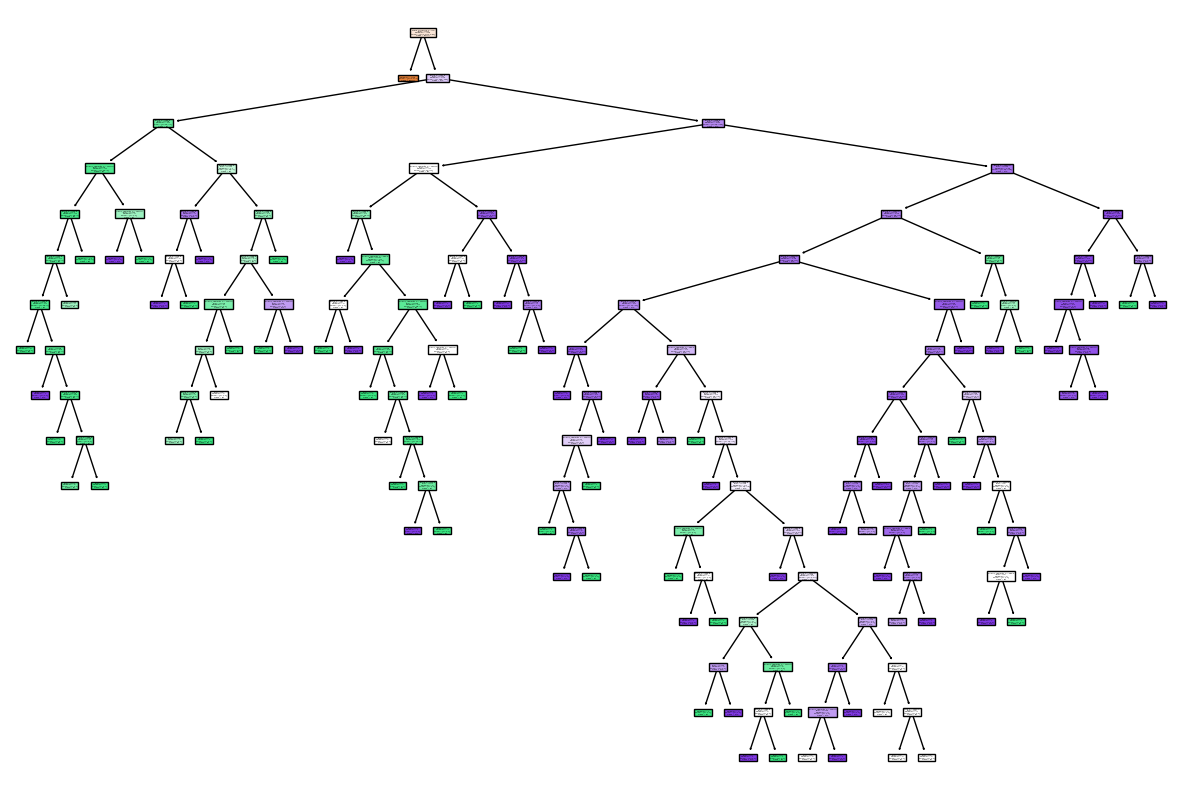

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(modelDT,feature_names=X.columns,filled=True,class_names=Y.unique())
plt.show()

# End